In [3]:
import pandas as pd
import numpy as np

### Limpieza de datos

In [4]:
df1=pd.read_csv("Parte1.csv", index_col = 0)
df2=pd.read_csv("Parte2.csv", index_col = 0)
df3=pd.read_csv("Parte3.csv", index_col = 0)
df4=pd.read_csv("Parte4.csv", index_col = 0)
df = df1.append(df2.append(df3.append(df4)))
df

,Precio,Marca,Modelo,Año,Color,Tipo_de_combustible,Puertas,Transmision,Motor,Tipo_de_carroceria,Km
0,"235,000",Chevrolet,Beat,2021,Plateado,Gasolina,5,Manual,1.2,Hatchback,10217 km
1,"520,000",JAC,SEI2,2021,Blanco,Gasolina,5,Automática,V6,SUV,23500 km
2,"659,000",Volkswagen,Golf,2021,Rojo,Gasolina,5,Automática,2.0,Coupé,12000 km
3,"458,000",Kia,Forte,2021,Rojo,Gasolina,5,Automática,2.0,Sedán,15500 km
4,"309,000",Volkswagen,Saveiro,2021,Plateado,Gasolina,4,Automática,1.6,Sedán,17600 km
...,...,...,...,...,...,...,...,...,...,...,...
601,"295,000",Honda,HR-V,2016,Azul,Gasolina,5,Automática,1.8,SUV,99504 km
602,"208,000",Honda,City,2016,Plateado,Gasolina,4,Manual,1.5,Sedán,54825 km
603,"213,000",Dodge,Attitude,2018,Blanco,Gasolina,4,Manual,1.2,Sedán,54057 km
604,"215,000",Nissan,March,2020,Plateado,Gasolina,5,Manual,1.6,Hatchback,30832 km


In [5]:
# Vemos cuantas son las columnas que contienen valores nulos
df.isnull().sum()

Precio                   0
Marca                    0
Modelo                   0
Año                      0
Color                    0
Tipo_de_combustible      0
Puertas                  0
Transmision             13
Motor                   44
Tipo_de_carroceria      64
Km                     258
dtype: int64

In [6]:
# Obtenemos las filas con algun valor nulo
valores_nulos = df[df.isnull().any(1)]
valores_nulos

,Precio,Marca,Modelo,Año,Color,Tipo_de_combustible,Puertas,Transmision,Motor,Tipo_de_carroceria,Km
398,"1,065,000",Mercedes-Benz,Clase CLS,2019,Negro,Híbrido/Gasolina,4,Automática secuencial,16371 km,NaN,NaN
399,"2,488,065",BMW,X5,2022,Gasolina,4,Automática secuencial,4.4,SUV,16 km,NaN
400,"1,844,000",BMW,X5,2022,Híbrido,4,Automática secuencial,3.0,SUV,10 km,NaN
401,"1,363,913",BMW,Serie 4,2022,Gasolina,2,Automática secuencial,3.0,Coupé,8 km,NaN
410,"2,503,605",BMW,Serie M,2022,Gasolina,4,Automática secuencial,4.4,Sedán,10 km,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1116,"1,129,000",Audi,Serie RS,2018,Rojo,Gasolina,2,Automática,2.9t con 454 HP,40000 km,NaN
214,"834,300",Ford,Ranger,2022,Blanco,Gasolina,4,Automática,Pick-Up,0 km,NaN
510,"3,450,000",Lamborghini,Gallardo,2012,Amarillo,Gasolina,3,Semiautomática,Coupé,9395 km,NaN
538,"1,625,000",BMW,X6,2021,Gasolina,5,Automática,Coupé,45000 km,NaN,NaN


In [7]:
# En algunas filas los valores estan desplazados de columna
# Podemos inferir que no todas las filas tenian los valores completos haciendo que se desplazaran de columna algunos valores

In [8]:
# A partir de columna color, algunos valores se dezplazaron de columna
# A partir de la columna 'color' convertimos todas en filas en lisats para limpiarlas

color = list(valores_nulos['Color'])

tipo_de_combustible = list(valores_nulos['Tipo_de_combustible'])

puertas = list(valores_nulos['Puertas'])

transmision = list(valores_nulos['Transmision'])

motor = list(valores_nulos['Motor'])

tipo_de_carroceria = list(valores_nulos['Tipo_de_carroceria'])

km = list(valores_nulos['Km'])

In [9]:
# Limpieza de las filas donde hayan datos en la columna 'colores' que le correspondan a la columna 'Puertas'

tipo_de_combustibles = ['Gasolina', 'Diésel', 'Eléctrico', 'Híbrido/Gasolina',
                       'Híbrido']
for i in range(len(color)):
    if color[i] in tipo_de_combustibles:

        # Tralsladamos los datos de izquierda a derecha
        km[i] = tipo_de_carroceria[i]
        tipo_de_carroceria[i] = motor[i]
        motor[i] = transmision[i]
        transmision[i] = puertas[i]
        puertas[i] = tipo_de_combustible[i]
        tipo_de_combustible[i] = color[i]
        color[i] = np.nan       
        
    else:
        pass

In [10]:
# Limpieza de las filas donde hayan datos en la columna 'Tipo_de_combustible' que le correspondan a la columna 'Transmisiones'

puertas_accesibles = ['2', '3', '4', '5', '6']

for i in range(len(tipo_de_combustible)):
    if tipo_de_combustible[i] in puertas_accesibles:
        
        # Trasladamos los datos de izquierda a derecha
        km[i] = tipo_de_carroceria[i]
        tipo_de_carroceria[i] = motor[i]
        motor[i] = transmision[i]
        transmision[i] = puertas[i]
        puertas[i] = tipo_de_combustible[i]
        tipo_de_combustible[i] = np.nan
        
    else:
        pass

In [11]:
# Limpieza de las filas donde hayan datos en la columna 'Puertas' que le correspondan a la columna 'Motor'

transmisiones = ['Automática', 'Manual', 'CVT', 'Automática secuencial', 'Semiautomática']

for i in range(len(puertas)):
    if puertas[i] in transmisiones:
        
        # Trasladamos los datos de izquierda a derecha
        km[i] = tipo_de_carroceria[i]
        tipo_de_carroceria[i] = motor[i]
        motor[i] = transmision[i]
        transmision[i] = puertas[i]
        puertas[i] = np.nan
        
    else:
        pass

In [12]:
# Limpieza de las filas donde hayan datos en la columna 'Transmision' que le correspondan a la columna 'Motor' 

transmisiones = ['Automática', 'Manual', 'CVT', 'Automática secuencial', 'Semiautomática']

for i in range(len(transmision)):
    if transmision[i] not in transmisiones:
        
        # Trasladamos los datos de izquierda a derecha
        km[i] = tipo_de_carroceria[i]
        tipo_de_carroceria[i] = motor[i]
        motor[i] = transmision[i] 
        transmision[i] = np.nan
        
    else:
        pass

In [13]:
# Limpieza de las filas donde hayan datos en la columna 'Motor' que le correspondan a la columna 'Tipo_de_carroceria'

tipo_de_carrocerias = ['Camión ligero', 'Convertible', 'Copué', 'Crossover', 'Furgoneta', 'Hatchback', 'Minivan',
                       'Monovolumen', 'Pick-Up', 'Sedán', 'SUV', 'Todo terreno', 'Vagoneta', 'Van']

for i in range(len(motor)):
    if (motor[i] in tipo_de_carrocerias) or tipo_de_carroceria[i] == np.nan:
        
        # Trasladamos los datos de izquierda a derecha
        km[i] = tipo_de_carroceria[i]
        tipo_de_carroceria[i] = motor[i]
        motor[i] = np.nan
        
    else:
        pass

In [14]:
# Limpieza de las filas donde haya datos de la columna 'Tipo_de_carroceria' que le corrspondan a la columna 'Km'

tipo_de_carrocerias = ['Camión ligero', 'Convertible', 'Coupé', 'Crossover', 'Furgoneta', 'Hatchback', 'Minivan',
                       'Monovolumen', 'Pick-Up', 'Sedán', 'SUV', 'Todo terreno', 'Vagoneta', 'Van']

for i in range(len(tipo_de_carroceria)):
    if tipo_de_carroceria[i] not in tipo_de_carrocerias:
        
        # Trasladamos los datos de izquierda a derecha
        km[i] = tipo_de_carroceria[i]
        tipo_de_carroceria[i] = np.nan
        
    else:
        pass

In [15]:
# Obtenemos el DataFrame limpio

#Eliminamos las columnas donde se pudo haber trasladado al menos un dato
df_limpio = valores_nulos.drop(['Color', 'Tipo_de_combustible', 'Puertas', 'Transmision', 'Motor', 'Tipo_de_carroceria',
                           'Km'], axis=1)

#Insertamos las nuevas columnas una vez ya limpiadas
df_limpio.insert(4, 'Color', color)
df_limpio.insert(5, 'Tipo_de_combustible', tipo_de_combustible)
df_limpio.insert(6, 'Puertas', puertas)
df_limpio.insert(7, 'Transmision', transmision)
df_limpio.insert(8, 'Motor', motor)
df_limpio.insert(9, 'Tipo_de_carroceria', tipo_de_carroceria)
df_limpio.insert(10, 'Km', km)
df_limpio

,Precio,Marca,Modelo,Año,Color,Tipo_de_combustible,Puertas,Transmision,Motor,Tipo_de_carroceria,Km
398,"1,065,000",Mercedes-Benz,Clase CLS,2019,Negro,Híbrido/Gasolina,4,Automática secuencial,16371 km,NaN,NaN
399,"2,488,065",BMW,X5,2022,NaN,Gasolina,4,Automática secuencial,4.4,SUV,16 km
400,"1,844,000",BMW,X5,2022,NaN,Híbrido,4,Automática secuencial,3.0,SUV,10 km
401,"1,363,913",BMW,Serie 4,2022,NaN,Gasolina,2,Automática secuencial,3.0,Coupé,8 km
410,"2,503,605",BMW,Serie M,2022,NaN,Gasolina,4,Automática secuencial,4.4,Sedán,10 km
...,...,...,...,...,...,...,...,...,...,...,...
1116,"1,129,000",Audi,Serie RS,2018,Rojo,Gasolina,2,Automática,2.9t con 454 HP,NaN,40000 km
214,"834,300",Ford,Ranger,2022,Blanco,Gasolina,4,Automática,NaN,Pick-Up,0 km
510,"3,450,000",Lamborghini,Gallardo,2012,Amarillo,Gasolina,3,Semiautomática,Coupé,NaN,9395 km
538,"1,625,000",BMW,X6,2021,NaN,Gasolina,5,Automática,Coupé,NaN,45000 km


In [16]:
# Ahora que hemos limpiado los datos, vemos cuatos valores nulos de la columna 'Km'
df_nulos = df_limpio[df_limpio['Km'].isnull()]
df_nulos.head()

,Precio,Marca,Modelo,Año,Color,Tipo_de_combustible,Puertas,Transmision,Motor,Tipo_de_carroceria,Km
398,"1,065,000",Mercedes-Benz,Clase CLS,2019,Negro,Híbrido/Gasolina,4,Automática secuencial,16371 km,NaN,NaN
428,"1,350,000",Lincoln,Aviator,2020,NaN,Gasolina,5,Automática secuencial,7136 km,NaN,NaN
513,"3,106,050",Audi,Serie RS,2022,Negro,Híbrido/Gasolina,4,Semiautomática,0 km,NaN,NaN
521,"3,400,000",Ferrari,F 430,2006,Rojo,Gasolina,2,Semiautomática,14890 km,NaN,NaN
522,"575,000",Jeep,146,2015,Rojo,Gasolina,5,Semiautomática,70000 km,NaN,NaN


In [17]:
# Vemos que los valores de la columna 'Km' se encuentran en la columna 'Motor', entonces los movemos a la columna 'Km'
df_nulos['Km'] = df_nulos['Motor']
df_nulos.loc[: , 'Motor'] = np.nan
df_nulos

<ipython-input-17-f56cd9c237df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nulos['Km'] = df_nulos['Motor']
C:\Users\PC1\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Precio,Marca,Modelo,Año,Color,Tipo_de_combustible,Puertas,Transmision,Motor,Tipo_de_carroceria,Km
398,"1,065,000",Mercedes-Benz,Clase CLS,2019,Negro,Híbrido/Gasolina,4,Automática secuencial,NaN,NaN,16371 km
428,"1,350,000",Lincoln,Aviator,2020,NaN,Gasolina,5,Automática secuencial,NaN,NaN,7136 km
513,"3,106,050",Audi,Serie RS,2022,Negro,Híbrido/Gasolina,4,Semiautomática,NaN,NaN,0 km
521,"3,400,000",Ferrari,F 430,2006,Rojo,Gasolina,2,Semiautomática,NaN,NaN,14890 km
522,"575,000",Jeep,146,2015,Rojo,Gasolina,5,Semiautomática,NaN,NaN,70000 km
596,"560,000",Suzuki,SUZUKI JIMNY GLX TM,2022,NaN,Gasolina,3,NaN,NaN,NaN,500 km
624,"2,072,900",GMC,Yukon,2022,Negro,Gasolina,5,NaN,NaN,NaN,0 km
629,"479,990",Volkswagen,T-Cross,2022,NaN,Gasolina,5,NaN,NaN,NaN,0 km
630,"1,062,990",Volkswagen,Teramont,2022,NaN,Gasolina,5,NaN,NaN,NaN,0 km
76,"299,000",Nissan,Versa,2020,Gris,Gasolina,5,NaN,NaN,NaN,13902 km


In [18]:
# Del DataFrame df_limpio eliminamos las filas donde se encuentre algun valor nulo en la columna 'Km' debido a que este
# dato se encuentra desplazado en la columna motor. Con el DataFrame df_nulos agregamos nuevamente las filas que se 
# eliminan en df_limpio, sólo que ya con los datos corregidos en la columna 'Km'
df_recuperados = df_limpio[df_limpio['Km'].notna()]
df_recuperados = df_recuperados.append(df_nulos)
df_recuperados

,Precio,Marca,Modelo,Año,Color,Tipo_de_combustible,Puertas,Transmision,Motor,Tipo_de_carroceria,Km
399,"2,488,065",BMW,X5,2022,NaN,Gasolina,4,Automática secuencial,4.4,SUV,16 km
400,"1,844,000",BMW,X5,2022,NaN,Híbrido,4,Automática secuencial,3.0,SUV,10 km
401,"1,363,913",BMW,Serie 4,2022,NaN,Gasolina,2,Automática secuencial,3.0,Coupé,8 km
410,"2,503,605",BMW,Serie M,2022,NaN,Gasolina,4,Automática secuencial,4.4,Sedán,10 km
422,"2,197,900",Porsche,911,2014,Negro,Gasolina,2,Automática secuencial,Coupé,NaN,8700 km
...,...,...,...,...,...,...,...,...,...,...,...
571,"1,108,900",Jeep,Wrangler,2022,NaN,Gasolina,6,NaN,NaN,NaN,17 km
572,"589,000",Jeep,Cherokee,2018,Gris,Gasolina,6,NaN,NaN,NaN,114000 km
573,"689,000",Mini,Clubman,2022,NaN,Gasolina,6,NaN,NaN,NaN,4000 km
576,"520,000",BMW,Serie 7,2015,NaN,Gasolina,6,NaN,NaN,NaN,80000 km


In [19]:
# De nuestro DataFrame inicial df reemplazamos las filas donde se encuentre algun valor nulo en la columna 'Km' por las dilas 
# del DataFrame df_recuperados

df_final = df[df['Km'].notna()]
df_final = df_final.append(df_recuperados)
df_final

,Precio,Marca,Modelo,Año,Color,Tipo_de_combustible,Puertas,Transmision,Motor,Tipo_de_carroceria,Km
0,"235,000",Chevrolet,Beat,2021,Plateado,Gasolina,5,Manual,1.2,Hatchback,10217 km
1,"520,000",JAC,SEI2,2021,Blanco,Gasolina,5,Automática,V6,SUV,23500 km
2,"659,000",Volkswagen,Golf,2021,Rojo,Gasolina,5,Automática,2.0,Coupé,12000 km
3,"458,000",Kia,Forte,2021,Rojo,Gasolina,5,Automática,2.0,Sedán,15500 km
4,"309,000",Volkswagen,Saveiro,2021,Plateado,Gasolina,4,Automática,1.6,Sedán,17600 km
...,...,...,...,...,...,...,...,...,...,...,...
571,"1,108,900",Jeep,Wrangler,2022,NaN,Gasolina,6,NaN,NaN,NaN,17 km
572,"589,000",Jeep,Cherokee,2018,Gris,Gasolina,6,NaN,NaN,NaN,114000 km
573,"689,000",Mini,Clubman,2022,NaN,Gasolina,6,NaN,NaN,NaN,4000 km
576,"520,000",BMW,Serie 7,2015,NaN,Gasolina,6,NaN,NaN,NaN,80000 km


In [20]:
# Vemos cuantas son las columnas que contienen valores nulos
df_final.isnull().sum()

Precio                   0
Marca                    0
Modelo                   0
Año                      0
Color                   92
Tipo_de_combustible     20
Puertas                  0
Transmision             30
Motor                  152
Tipo_de_carroceria      85
Km                       0
dtype: int64

In [21]:
import re

In [22]:
# Eliminamos los caracteres 'km' de la columna 'Km' y los caracteres ',' de la columna 

lista_km = list(df_final['Km'])
km = []
for text in lista_km:
    km.append(re.sub(r"[a-z]", "", text, flags=re.I))
    
lista_precio = list(df_final['Precio'])
precio = []
for text in lista_precio:
    precio.append(re.sub(r",", "", text, flags=re.I))    

df_final.drop(['Km'], axis=1)
df_final['Km'] = km

df_final.drop(['Precio'], axis=1)
df_final['Precio'] = precio


df_final

,Precio,Marca,Modelo,Año,Color,Tipo_de_combustible,Puertas,Transmision,Motor,Tipo_de_carroceria,Km
0,235000,Chevrolet,Beat,2021,Plateado,Gasolina,5,Manual,1.2,Hatchback,10217
1,520000,JAC,SEI2,2021,Blanco,Gasolina,5,Automática,V6,SUV,23500
2,659000,Volkswagen,Golf,2021,Rojo,Gasolina,5,Automática,2.0,Coupé,12000
3,458000,Kia,Forte,2021,Rojo,Gasolina,5,Automática,2.0,Sedán,15500
4,309000,Volkswagen,Saveiro,2021,Plateado,Gasolina,4,Automática,1.6,Sedán,17600
...,...,...,...,...,...,...,...,...,...,...,...
571,1108900,Jeep,Wrangler,2022,NaN,Gasolina,6,NaN,NaN,NaN,17
572,589000,Jeep,Cherokee,2018,Gris,Gasolina,6,NaN,NaN,NaN,114000
573,689000,Mini,Clubman,2022,NaN,Gasolina,6,NaN,NaN,NaN,4000
576,520000,BMW,Serie 7,2015,NaN,Gasolina,6,NaN,NaN,NaN,80000


In [23]:
# Configuramos el tipo de datos del df_final

df_final['Precio']=df_final['Precio'].astype('int64')
df_final['Km']=df_final['Km'].astype('int64')
df_final.dtypes

Precio                  int64
Marca                  object
Modelo                 object
Año                     int64
Color                  object
Tipo_de_combustible    object
Puertas                object
Transmision            object
Motor                  object
Tipo_de_carroceria     object
Km                      int64
dtype: object

### Analisis y visualización 

In [110]:
import matplotlib.pyplot as plot 
import seaborn as sns
sns.set()

In [38]:
df_final.describe()

,Precio,Año,Km
count,5.240000e+03,5240.000000,5240.000000
mean,4.426136e+05,2017.689695,56917.179771
std,4.109743e+05,2.980289,36207.982533
min,6.800000e+04,1982.000000,0.000000
25%,2.420000e+05,2016.000000,29625.000000
50%,3.435000e+05,2018.000000,55280.000000
75%,4.782498e+05,2020.000000,80000.000000
max,6.300000e+06,2023.000000,329000.000000


In [107]:
# Numero de diferentes tipos de elementos 
df['Marca'].value_counts()

Chevrolet                    996
Nissan                       603
Volkswagen                   455
Honda                        437
Toyota                       339
Ford                         335
BMW                          261
Kia                          242
Mercedes-Benz                155
SEAT                         145
Dodge                        132
RAM                          121
Jeep                         118
Audi                         117
Mazda                        109
Hyundai                      103
Renault                       93
Mini                          83
Mitsubishi                    47
Peugeot                       42
Suzuki                        39
Alfa Romeo                    28
Cadillac                      27
GMC                           26
Buick                         24
Porsche                       24
Acura                         22
Infiniti                      14
Volvo                         13
Lamborghini                   12
Subaru    

Text(0, 0.5, 'Marcas')

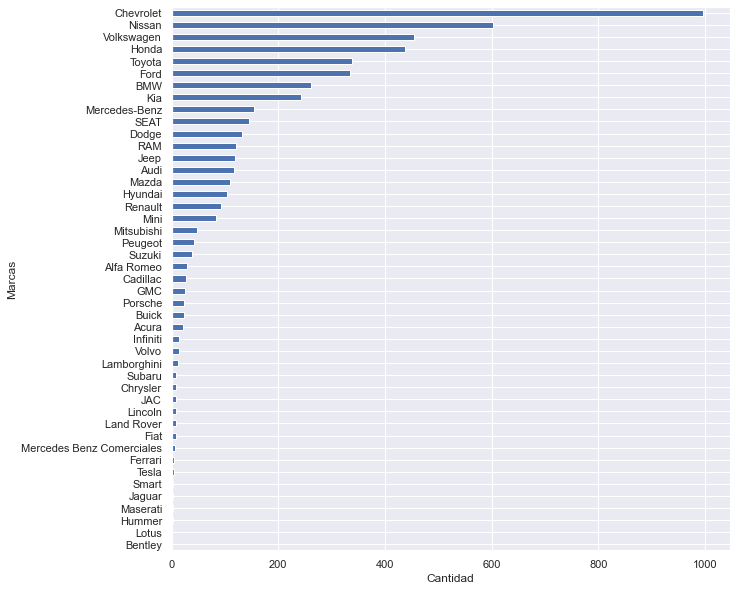

In [139]:
df['Marca'].value_counts(ascending=True).plot(kind='barh', figsize=(10,10))
plt.xlabel('Cantidad')
plt.ylabel('Marcas')